In [47]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [48]:
# ilkleme
classifier = Sequential()

# Adım 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Adım 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 2. convolution katmanı
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adım 3 - Flattening
classifier.add(Flatten())

# Adım 4 - YSA
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [49]:
# CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [50]:
# CNN ve resimler
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory('veriler/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('veriler/test_set',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')


Found 2662 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


In [51]:
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 2000)

C:\Users\cihat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


8000/8000 [==============================] - 7s 857us/step - loss: 0.5558 - accuracy: 0.7137 - val_loss: 0.3060 - val_accuracy: 0.8325


In [52]:
kayipVerisi = pd.DataFrame(classifier.history.history)

<AxesSubplot:>

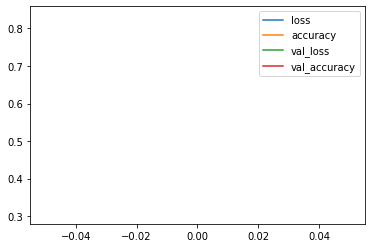

In [53]:
kayipVerisi.plot()

In [54]:
import numpy as np
import pandas as pd

In [55]:
test_set.reset()
pred=classifier.predict_generator(test_set,verbose=1)
#pred = list(map(round,pred))
pred[pred > .5] = 1
pred[pred <= .5] = 0

print('prediction gecti')

 45/203 [=====>........................] - ETA: 0s

C:\Users\cihat\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


203/203 [==============================] - 1s 2ms/step
prediction gecti


In [56]:
#labels = (training_set.class_indices)

test_labels = []

for i in range(0,int(203)):
    test_labels.extend(np.array(test_set[i][1]))
    
print('test_labels')
print(test_labels)

test_labels
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.

In [57]:
#labels = (training_set.class_indices)
'''
idx = []  
for i in test_set:
    ixx = (test_set.batch_index - 1) * test_set.batch_size
    ixx = test_set.filenames[ixx : ixx + test_set.batch_size]
    idx.append(ixx)
    print(i)
    print(idx)
'''

'\nidx = []  \nfor i in test_set:\n    ixx = (test_set.batch_index - 1) * test_set.batch_size\n    ixx = test_set.filenames[ixx : ixx + test_set.batch_size]\n    idx.append(ixx)\n    print(i)\n    print(idx)\n'

In [58]:
dosyaisimleri = test_set.filenames
#abc = test_set.
#print(idx)
#test_labels = test_set.
sonuc = pd.DataFrame()
sonuc['dosyaisimleri']= dosyaisimleri
sonuc['tahminler'] = pred
sonuc['test'] = test_labels   

In [59]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(test_labels, pred)
print (cm)

[[131  20]
 [ 44   8]]
